In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from icecream import ic

# Data Loading

In [3]:
from data.file_loading import load_data

possible_keys = ['msciworld','msciem', 'bs_key']
for key in possible_keys:
    try:
        load_data(key)
        print(f'{key} successfully loaded.')
    except Exception as e:
        print(e)

msciworld successfully loaded.
msciem successfully loaded.
'bs_key is not a valid key.'


# Investments

In [4]:
from investmentclasses import Share
share_world = Share('msciworld', 0.7)
share_em = Share('msciem', 0.3)

# Trigger

In [5]:
from triggers import TimeTrigger, TimeUnit, DeviationTrigger, DeviationType
from datetime import datetime, date
from propagation import Portfolio
from rebalancer import Rebalancer

time = TimeTrigger(TimeUnit.MONTHS, 7, date(2018,7,1))
port = None
DATE_FORMAT = "%d.%m.%Y"
test_date_pre = datetime.strptime('01.12.2017', DATE_FORMAT).date() 
test_date_at = datetime.strptime('01.07.2018', DATE_FORMAT).date() 
test_date_post = datetime.strptime('01.02.2019', DATE_FORMAT).date() 
test_date_false = datetime.strptime('01.06.2017', DATE_FORMAT).date() 

ic(time.check_trigger(test_date_pre, port))
ic(time.check_trigger(test_date_at, port))
ic(time.check_trigger(test_date_post, port))
ic(time.check_trigger(test_date_false, port))

deviat = DeviationTrigger(DeviationType.RELATIVE, 0.3)

ic| time.check_trigger(test_date_pre, port): True
ic| time.check_trigger(test_date_at, port): True
ic| time.check_trigger(test_date_post, port): True
ic| time.check_trigger(test_date_false, port): False


# Rebalancer

In [6]:
from rebalancer import Rebalancer
rebalancer = Rebalancer()
rebalancer.add_trigger(time)

# Portfolio

In [7]:
from propagation import Portfolio
from datetime import datetime
assets = [share_world, share_em]
portfolio = Portfolio(assets, rebalancer=rebalancer, initial_cash=10000)
DATE_FORMAT = "%d.%m.%Y"
start_date = datetime.strptime('01.01.2018', DATE_FORMAT).date() 
end_date = datetime.strptime('01.01.2019', DATE_FORMAT).date() 

portfolio.simulate_timeinterval(start_date, end_date)
print(portfolio.combined_order_history)
print(portfolio.cash_position)
#TODO: cashposition not 0

ic| date: datetime.date(2018, 7, 1)
ic| changes: [6998.599999999999, 2999.4]
ic| portfolio.cash_position: 10000
ic| buy_order: HistoryOrder(key_name='msciworld',
                            date=datetime.date(2018, 7, 1),
                            amount=117.83804173570975,
                            order_price=59.3832,
                            fees=1.0,
                            tax=0)
ic| portfolio.cash_position: 3000.4000000000005
ic| portfolio.cash_position: 3000.4000000000005
ic| buy_order: HistoryOrder(key_name='msciem',
                            date=datetime.date(2018, 7, 1),
                            amount=62.14811442184193,
                            order_price=48.24603333333334,
                            fees=1.0,
                            tax=0)
ic| portfolio.cash_position: 4.547473508864641e-13


[HistoryOrder(key_name='msciworld', date=datetime.date(2018, 7, 1), amount=117.83804173570975, order_price=59.3832, fees=1.0, tax=0), HistoryOrder(key_name='msciem', date=datetime.date(2018, 7, 1), amount=62.14811442184193, order_price=48.24603333333334, fees=1.0, tax=0)]
4.547473508864641e-13


# Visualisation

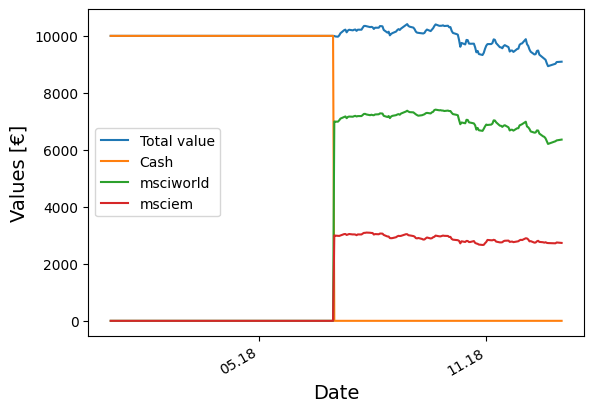

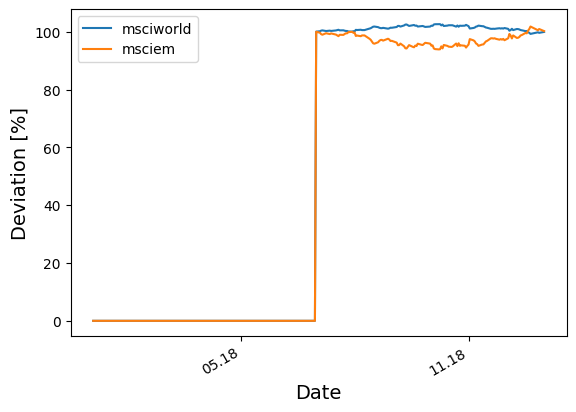

In [8]:
from visualisation import *
plot_value_history(portfolio)
plot_deviation_history(portfolio)

# portfolio builder

In [9]:
from propagation import Portfolio
from example_blueprint import portfolio_blueprint_0d


In [10]:
print(portfolio_blueprint_0d)
test_portfolio = Portfolio.from_dict(portfolio_blueprint_0d)

{'initial_cash': 5000, 'asset': [{'class': <class 'investmentclasses.Share'>, 'key': 'msciworld', 'ratio': 7}, {'class': <class 'investmentclasses.Share'>, 'key': 'msciem', 'ratio': 3}], 'rebalancer': [{'class': <class 'triggers.DeviationTrigger'>, 'deviation_type': <DeviationType.RELATIVE: 'r'>, 'deviation_threshold': 5}, {'class': <class 'triggers.TimeTrigger'>, 'time_unit': <TimeUnit.MONTHS: 'm'>, 'time_interval': 6}], 'deposit': [{'class': <class 'deposits.PureCash'>, 'deposit_value': 500, 'triggers': [{'class': <class 'triggers.TimeTrigger'>, 'time_unit': <TimeUnit.MONTHS: 'm'>, 'time_interval': 6}]}]}


# Tester

In [11]:
from example_blueprint import portfolio_blueprint_0d, portfolio_blueprint_1d
from main import main
print(portfolio_blueprint_1d)

{'initial_cash': 5000, 'asset': [{'class': <class 'investmentclasses.Share'>, 'key': 'msciworld', 'ratio': 7}, {'class': <class 'investmentclasses.Share'>, 'key': 'msciem', 'ratio': 3}], 'rebalancer': [{'class': <class 'triggers.DeviationTrigger'>, 'deviation_type': <DeviationType.RELATIVE: 'r'>, 'deviation_threshold': 5}, {'class': <class 'triggers.TimeTrigger'>, 'time_unit': <TimeUnit.MONTHS: 'm'>, 'time_interval': 6}], 'deposit': [{'class': <class 'deposits.PureCash'>, 'deposit_value': 500, 'triggers': [{'class': <class 'triggers.TimeTrigger'>, 'time_unit': <TimeUnit.MONTHS: 'm'>, 'time_interval': [1, 6, 5, 'lin', 'deposit_interval']}]}]}


In [12]:
main(portfolio_blueprint_0d)


In [37]:
from deposits import PureCash

from copy import deepcopy
portfolio_blueprint_1d = {
    'initial_cash': 5000, 
    'asset': [
        {'class': Share, 
         'key': 'msciworld', 
         'ratio': 1,
         }, 
        {'class': Share, 
         'key': 'msciem', 
         'ratio': 1}
    ], 
    'rebalancer': [
        {'class': DeviationTrigger, 
         'deviation_type': DeviationType.RELATIVE,
         'deviation_threshold': 5
         }, 
        {'class': TimeTrigger, 
         'time_unit': TimeUnit.MONTHS, 
         'time_interval': 6}
    ], 
    'deposit': [
        {'class': PureCash, 
         'deposit_value': 500, 
         'triggers':[
            {'class': TimeTrigger,
            'time_unit': TimeUnit.MONTHS, 
            'time_interval': [1,6,6,'linear','deposit_interval']}
         ]
        }
    ]
}

ic| var: 1.0


{'initial_cash': 5000, 'asset': [{'class': <class 'investmentclasses.Share'>, 'key': 'msciworld', 'ratio': 1}, {'class': <class 'investmentclasses.Share'>, 'key': 'msciem', 'ratio': 1}], 'rebalancer': [{'class': <class 'triggers.DeviationTrigger'>, 'deviation_type': <DeviationType.RELATIVE: 'r'>, 'deviation_threshold': 5}, {'class': <class 'triggers.TimeTrigger'>, 'time_unit': <TimeUnit.MONTHS: 'm'>, 'time_interval': 6}], 'deposit': [{'class': <class 'deposits.PureCash'>, 'deposit_value': 500, 'triggers': [{'class': <class 'triggers.TimeTrigger'>, 'time_unit': <TimeUnit.MONTHS: 'm'>, 'time_interval': [1, 6, 6, 'linear', 'deposit_interval']}]}]}


ic| var: 2.0
ic| var: 3.0
ic| var: 4.0
ic| var: 5.0
ic| var: 6.0


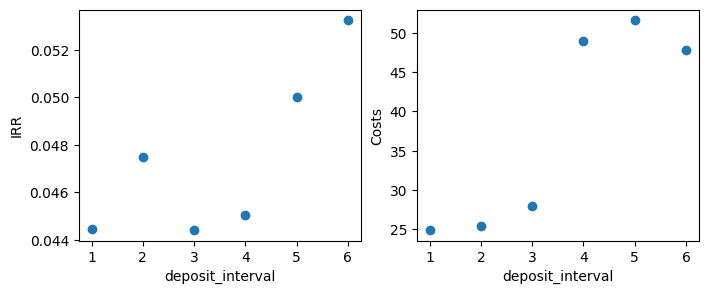

In [38]:
print(portfolio_blueprint_1d)
main(deepcopy(portfolio_blueprint_1d))